# CUSTOMER ANALYSIS FOR RETAIL

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
customer = pd.read_csv("D:\Analytics lab\Python\Case Study\Python Foundation Case Study 1 - Retail Case Study\Customer.csv") 
prod_info = pd.read_csv("D:\Analytics lab\Python\Case Study\Python Foundation Case Study 1 - Retail Case Study\prod_cat_info.csv")
transaction = pd.read_csv("D:\Analytics lab\Python\Case Study\Python Foundation Case Study 1 - Retail Case Study\Transactions.csv")

In [4]:
prod_info.rename(columns={"prod_sub_cat_code":"prod_subcat_code"}, inplace =True)

### Q1. Merge the datasets Customers, Product Hierarchy and Transactions as Customer_Final. Ensure to keep all customers who have done transactions with us and select the join type accordingly.

In [5]:
prod_trans = pd.merge(left = transaction, right = prod_info, on= ["prod_cat_code","prod_subcat_code"], how="left")

In [6]:
Customer_Final = pd.merge(left = prod_trans, right = customer, left_on= "cust_id", right_on= "customer_Id", how="left")

In [7]:
Customer_Final.head()

transaction_id  cust_id   tran_date  prod_subcat_code  prod_cat_code  Qty  \
0     80712190438   270351  28-02-2014                 1              1   -5   
1     29258453508   270384  27-02-2014                 5              3   -5   
2     51750724947   273420  24-02-2014                 6              5   -2   
3     93274880719   271509  24-02-2014                11              6   -3   
4     51750724947   273420  23-02-2014                 6              5   -2   

   Rate      Tax  total_amt Store_type          prod_cat prod_subcat  \
0  -772  405.300  -4265.300     e-Shop          Clothing       Women   
1 -1497  785.925  -8270.925     e-Shop       Electronics   Computers   
2  -791  166.110  -1748.110   TeleShop             Books         DIY   
3 -1363  429.345  -4518.345     e-Shop  Home and kitchen        Bath   
4  -791  166.110  -1748.110   TeleShop             Books         DIY   

   customer_Id         DOB Gender  city_code  
0       270351  26-09-1981      M        5.0  
1       270384  11-05-1973      F        8.0  
2       273420  27-07-1992      M        8.0  
3       271509  08-06-1981      M        3.0  
4       273420  27-07-1992      M        8.0

In [9]:
Customer_Final.dtypes

transaction_id        int64
cust_id               int64
tran_date            object
prod_subcat_code      int64
prod_cat_code         int64
Qty                   int64
Rate                  int64
Tax                 float64
total_amt           float64
Store_type           object
prod_cat             object
prod_subcat          object
customer_Id           int64
DOB                  object
Gender               object
city_code           float64
dtype: object

In [35]:
## converting tran_date and DOB in date format
Customer_Final["DOB"]= pd.to_datetime(Customer_Final["DOB"])
Customer_Final["tran_date"]= pd.to_datetime(Customer_Final["tran_date"])

C:\Users\malik\AppData\Local\Temp\ipykernel_2532\4256221736.py:2: UserWarning: Parsing '26-09-1981' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  Customer_Final["DOB"]= pd.to_datetime(Customer_Final["DOB"])
C:\Users\malik\AppData\Local\Temp\ipykernel_2532\4256221736.py:2: UserWarning: Parsing '27-07-1992' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  Customer_Final["DOB"]= pd.to_datetime(Customer_Final["DOB"])
C:\Users\malik\AppData\Local\Temp\ipykernel_2532\4256221736.py:2: UserWarning: Parsing '29-05-1981' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  Customer_Final["DOB"]= pd.to_datetime(Customer_Final["DOB"])
C:\Users\malik\AppData\Local\Temp\ipykernel_2532\4256221736.py:2: UserWarning: Parsing '21-04-1971' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  Customer_Fina

In [10]:
## Handeling the missing values
Customer_Final.drop_duplicates(inplace = True)

In [11]:
Customer_Final.duplicated().sum()

0

### Q2. Prepare a summary report for the merged data set.

###  a. Get the column names and their corresponding data types

In [12]:
Customer_Final.columns

Index(['transaction_id', 'cust_id', 'tran_date', 'prod_subcat_code',
       'prod_cat_code', 'Qty', 'Rate', 'Tax', 'total_amt', 'Store_type',
       'prod_cat', 'prod_subcat', 'customer_Id', 'DOB', 'Gender', 'city_code'],
      dtype='object')

In [36]:
Customer_Final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23040 entries, 0 to 23052
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   transaction_id    23040 non-null  int64         
 1   cust_id           23040 non-null  int64         
 2   tran_date         23040 non-null  datetime64[ns]
 3   prod_subcat_code  23040 non-null  int64         
 4   prod_cat_code     23040 non-null  int64         
 5   Qty               23040 non-null  int64         
 6   Rate              23040 non-null  int64         
 7   Tax               23040 non-null  float64       
 8   total_amt         23040 non-null  float64       
 9   Store_type        23040 non-null  object        
 10  prod_cat          23040 non-null  object        
 11  prod_subcat       23040 non-null  object        
 12  customer_Id       23040 non-null  int64         
 13  DOB               23040 non-null  datetime64[ns]
 14  Gender            2303

###  b. Top/Bottom 10 observations

In [13]:
Customer_Final.head(10)

transaction_id  cust_id   tran_date  prod_subcat_code  prod_cat_code  Qty  \
0     80712190438   270351  28-02-2014                 1              1   -5   
1     29258453508   270384  27-02-2014                 5              3   -5   
2     51750724947   273420  24-02-2014                 6              5   -2   
3     93274880719   271509  24-02-2014                11              6   -3   
4     51750724947   273420  23-02-2014                 6              5   -2   
5     97439039119   272357  23-02-2014                 8              3   -2   
6     45649838090   273667  22-02-2014                11              6   -1   
7     22643667930   271489  22-02-2014                12              6   -1   
8     79792372943   275108  22-02-2014                 3              1   -3   
9     50076728598   269014  21-02-2014                 8              3   -4   

   Rate      Tax  total_amt Store_type          prod_cat          prod_subcat  \
0  -772  405.300  -4265.300     e-Shop          Clothing                Women   
1 -1497  785.925  -8270.925     e-Shop       Electronics            Computers   
2  -791  166.110  -1748.110   TeleShop             Books                  DIY   
3 -1363  429.345  -4518.345     e-Shop  Home and kitchen                 Bath   
4  -791  166.110  -1748.110   TeleShop             Books                  DIY   
5  -824  173.040  -1821.040   TeleShop       Electronics  Personal Appliances   
6 -1450  152.250  -1602.250     e-Shop  Home and kitchen                 Bath   
7 -1225  128.625  -1353.625   TeleShop  Home and kitchen                Tools   
8  -908  286.020  -3010.020        MBR          Clothing                 Kids   
9  -581  244.020  -2568.020     e-Shop       Electronics  Personal Appliances   

   customer_Id         DOB Gender  city_code  
0       270351  26-09-1981      M        5.0  
1       270384  11-05-1973      F        8.0  
2       273420  27-07-1992      M        8.0  
3       271509  08-06-1981      M        3.0  
4       273420  27-07-1992      M        8.0  
5       272357  09-10-1982      F        6.0  
6       273667  29-05-1981      M        9.0  
7       271489  21-04-1971      M        9.0  
8       275108  04-11-1971      F        8.0  
9       269014  27-11-1979      F        3.0

In [14]:
Customer_Final.tail(10)

transaction_id  cust_id   tran_date  prod_subcat_code  prod_cat_code  \
23043     49882891062   271982  25-01-2011                10              5   
23044     14787475597   273982  25-01-2011                 4              3   
23045     50691119572   273031  25-01-2011                 6              5   
23046     40893803228   272049  25-01-2011                11              6   
23047     30856003613   266866  25-01-2011                 4              2   
23048     94340757522   274550  25-01-2011                12              5   
23049     89780862956   270022  25-01-2011                 4              1   
23050     85115299378   271020  25-01-2011                 2              6   
23051     72870271171   270911  25-01-2011                11              5   
23052     77960931771   271961  25-01-2011                11              5   

       Qty  Rate      Tax  total_amt Store_type          prod_cat  \
23043    4  1330  558.600   5878.600     e-Shop             Books   
23044    5   969  508.725   5353.725     e-Shop       Electronics   
23045    1  1148  120.540   1268.540   TeleShop             Books   
23046    3  1077  339.255   3570.255     e-Shop  Home and kitchen   
23047    2   444   93.240    981.240   TeleShop          Footwear   
23048    1  1264  132.720   1396.720     e-Shop             Books   
23049    1   677   71.085    748.085     e-Shop          Clothing   
23050    4  1052  441.840   4649.840        MBR  Home and kitchen   
23051    3  1142  359.730   3785.730   TeleShop             Books   
23052    1   447   46.935    493.935   TeleShop             Books   

       prod_subcat  customer_Id         DOB Gender  city_code  
23043  Non-Fiction       271982  10-08-1976      M        8.0  
23044      Mobiles       273982  12-10-1991      M        4.0  
23045          DIY       273031  17-01-1980      F        8.0  
23046         Bath       272049  28-06-1975      F        6.0  
23047         Kids       266866  18-04-1974      M        4.0  
23048     Academic       274550  21-02-1972      M        7.0  
23049         Mens       270022  27-04-1984      M        9.0  
23050   Furnishing       271020  20-06-1976      M        8.0  
23051     Children       270911  22-05-1970      M        2.0  
23052     Children       271961  15-01-1982      M        1.0

###  c. “Five-number summary” for continuous variables (min, Q1, median, Q3 and max)

In [16]:
Customer_Final.describe().T

count          mean           std          min  \
transaction_id    23040.0  5.006955e+10  2.898062e+10  3268991.000   
cust_id           23040.0  2.710219e+05  2.431574e+03   266783.000   
prod_subcat_code  23040.0  6.148785e+00  3.726197e+00        1.000   
prod_cat_code     23040.0  3.763498e+00  1.677091e+00        1.000   
Qty               23040.0  2.435764e+00  2.264326e+00       -5.000   
Rate              23040.0  6.370950e+02  6.217274e+02    -1499.000   
Tax               23040.0  2.486775e+02  1.871883e+02        7.350   
total_amt         23040.0  2.109865e+03  2.505610e+03    -8270.925   
customer_Id       23040.0  2.710219e+05  2.431574e+03   266783.000   
city_code         23032.0  5.483067e+00  2.863331e+00        1.000   

                           25%           50%           75%           max  
transaction_id    2.493315e+10  5.009188e+10  7.532632e+10  9.998755e+10  
cust_id           2.689350e+05  2.709805e+05  2.731142e+05  2.752650e+05  
prod_subcat_code  3.000000e+00  5.000000e+00  1.000000e+01  1.200000e+01  
prod_cat_code     2.000000e+00  4.000000e+00  5.000000e+00  6.000000e+00  
Qty               1.000000e+00  3.000000e+00  4.000000e+00  5.000000e+00  
Rate              3.120000e+02  7.100000e+02  1.109000e+03  1.500000e+03  
Tax               9.828000e+01  1.990800e+02  3.657675e+02  7.875000e+02  
total_amt         7.624500e+02  1.756950e+03  3.570255e+03  8.287500e+03  
customer_Id       2.689350e+05  2.709805e+05  2.731142e+05  2.752650e+05  
city_code         3.000000e+00  5.000000e+00  8.000000e+00  1.000000e+01

### d. Frequency tables for all the categorical variables

In [17]:
Customer_Final.loc[:,Customer_Final.dtypes== "object"].describe().T

count unique         top   freq
tran_date    23040   1129  13-07-2011     35
Store_type   23040      4      e-Shop   9304
prod_cat     23040      6       Books   6066
prod_subcat  23040     18       Women   3046
DOB          23040   3987  17-09-1982     32
Gender       23031      2           M  11804

### Q3. Generate histograms for all continuous variables and frequency bars for categorical variables.

In [18]:
cont_customer= Customer_Final.loc[:, ["prod_subcat_code","prod_cat_code","Qty","Rate","Tax","total_amt"]]

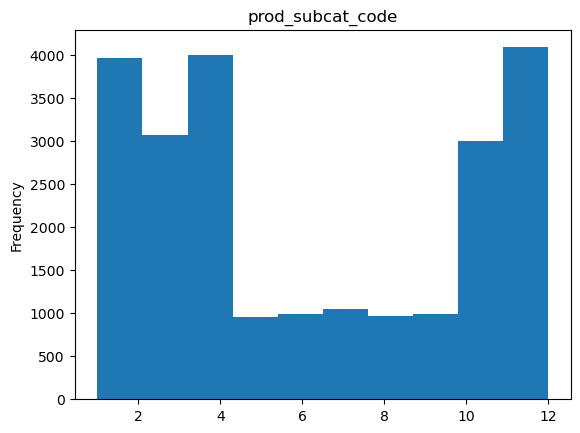

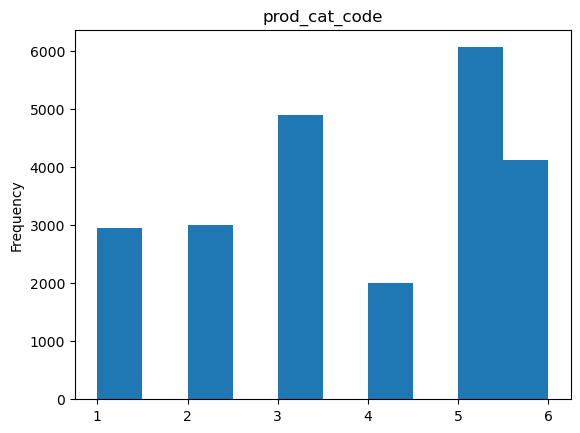

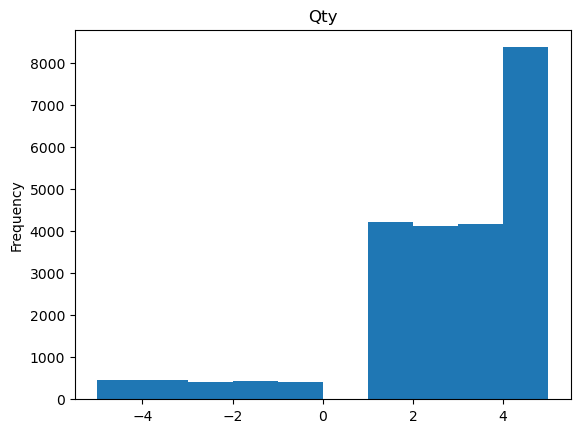

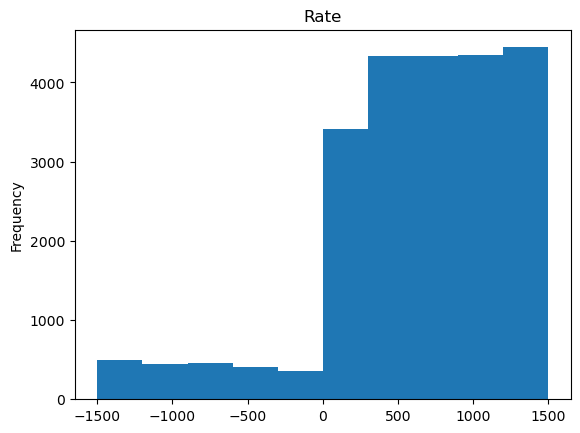

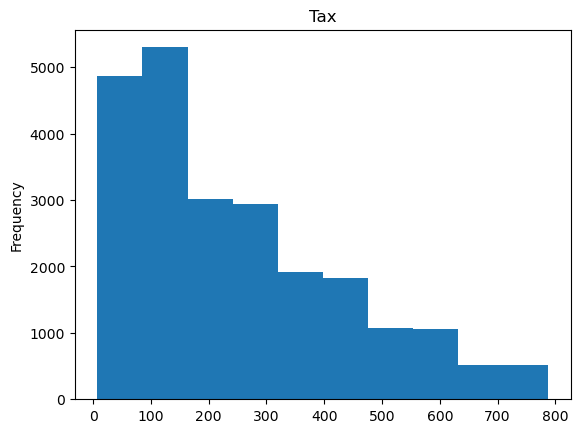

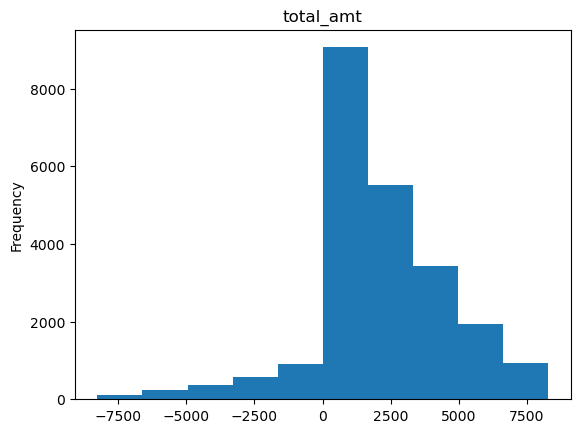

In [19]:
for x in cont_customer.columns:
    cont_customer[x].plot(kind="hist")
    plt.title(x)
    plt.show()

In [20]:
category_customer = Customer_Final.loc[:, Customer_Final.dtypes== "object"]

In [21]:
category_customer.columns

Index(['tran_date', 'Store_type', 'prod_cat', 'prod_subcat', 'DOB', 'Gender'], dtype='object')

C:\Users\malik\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


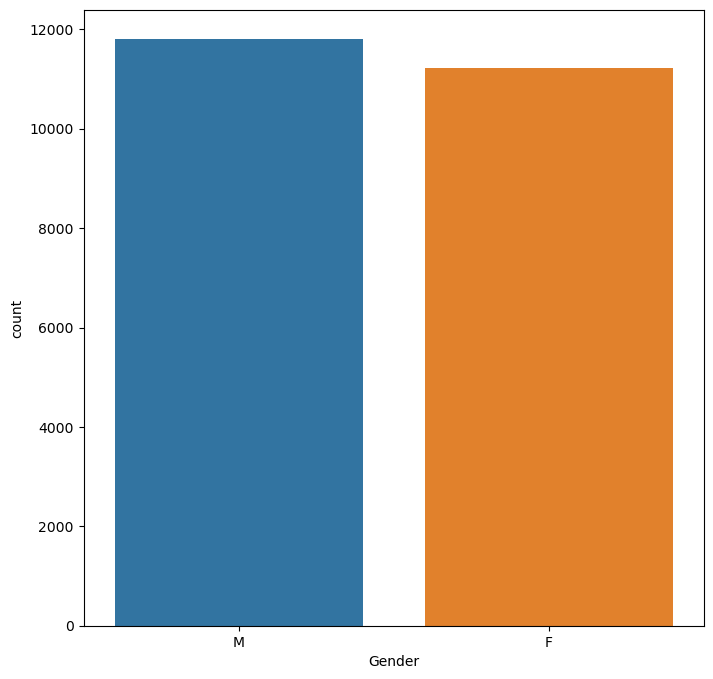

In [22]:
plt.figure(figsize=(8,8))
sns.countplot(category_customer['Gender'])
plt.xlabel('Gender')
plt.show()

C:\Users\malik\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


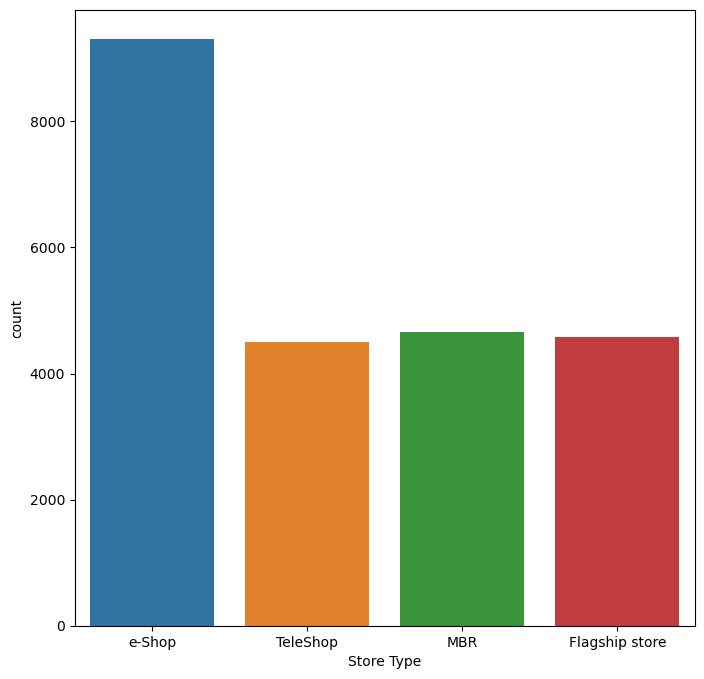

In [23]:
plt.figure(figsize=(8,8))
sns.countplot(category_customer['Store_type'])
plt.xlabel('Store Type')
plt.show()

C:\Users\malik\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


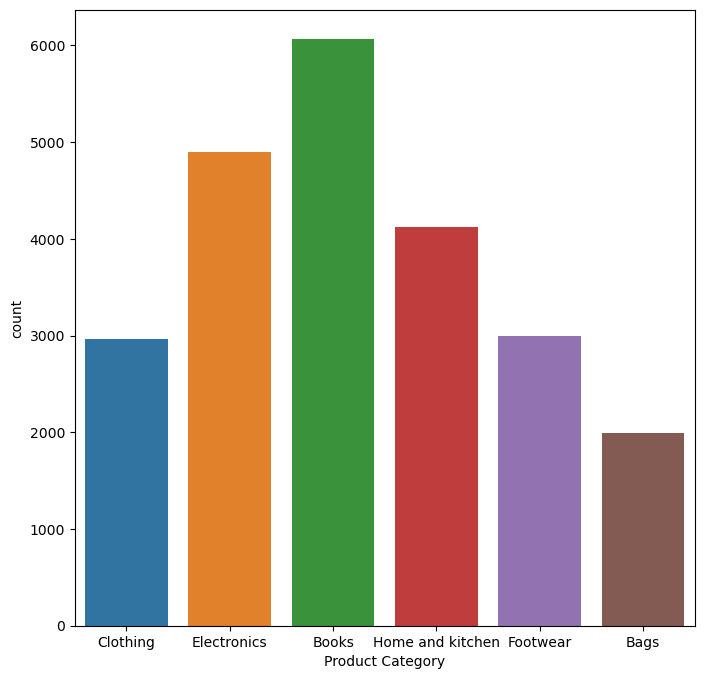

In [24]:
plt.figure(figsize=(8,8))
sns.countplot(category_customer['prod_cat'])
plt.xlabel('Product Category')
plt.show()

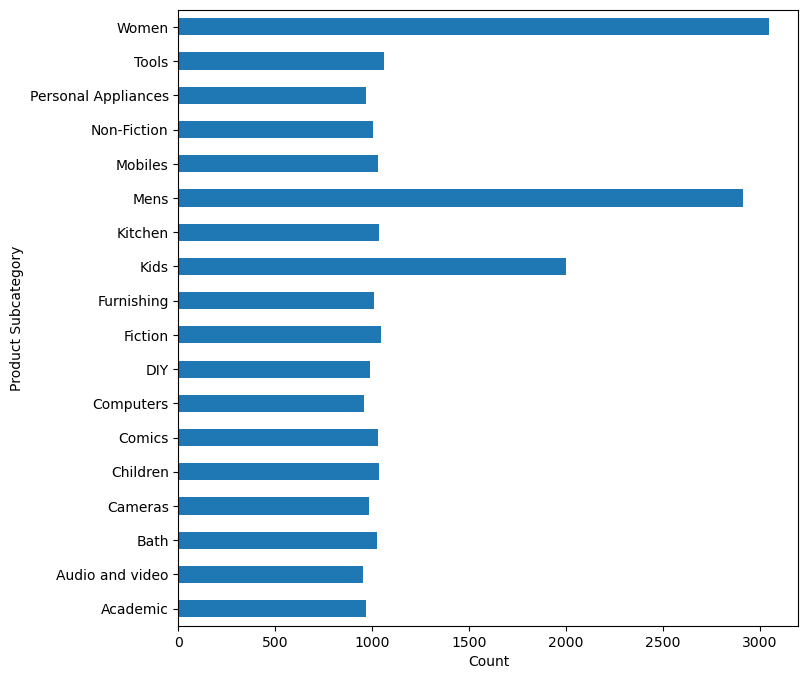

In [25]:
plt.figure(figsize=(8,8))
category_customer.groupby('prod_subcat')['prod_subcat'].count().plot(kind='barh')
plt.xlabel('Count')
plt.ylabel('Product Subcategory')
plt.show()

### Q4. Calculate the following information using the merged dataset :

### a. Time period of the available transaction data

In [26]:
Customer_Final.sort_values( by = 'tran_date')

transaction_id  cust_id tran_date  prod_subcat_code  prod_cat_code  \
16050     47933752822   270192  1/1/2012                 3              1   
16052     35798683065   271913  1/1/2012                 1              1   
16053     30078154552   269151  1/1/2012                 3              2   
16054     57039573748   268282  1/1/2012                 4              1   
16055     41901986246   269269  1/1/2012                 7              5   
...               ...      ...       ...               ...            ...   
3418       7142765743   270331  9/9/2013                 1              4   
3417      56887661045   271112  9/9/2013                 2              6   
3416        930973786   267264  9/9/2013                 2              6   
3426      62656748444   274079  9/9/2013                 4              3   
3431      74210075173   273342  9/9/2013                 4              1   

       Qty  Rate      Tax  total_amt Store_type          prod_cat prod_subcat  \
16050    4   215   90.300    950.300     e-Shop          Clothing        Kids   
16052    1   229   24.045    253.045        MBR          Clothing       Women   
16053    1   456   47.880    503.880     e-Shop          Footwear       Women   
16054    1  1024  107.520   1131.520        MBR          Clothing        Mens   
16055    2  1122  235.620   2479.620        MBR             Books     Fiction   
...    ...   ...      ...        ...        ...               ...         ...   
3418     1  1126  118.230   1244.230     e-Shop              Bags        Mens   
3417     3   740  233.100   2453.100   TeleShop  Home and kitchen  Furnishing   
3416     3  1245  392.175   4127.175   TeleShop  Home and kitchen  Furnishing   
3426     5  1195  627.375   6602.375     e-Shop       Electronics     Mobiles   
3431     3   117   36.855    387.855   TeleShop          Clothing        Mens   

       customer_Id         DOB Gender  city_code  
16050       270192  01-06-1987      F        4.0  
16052       271913  15-10-1985      F        2.0  
16053       269151  29-04-1981      F        2.0  
16054       268282  22-12-1970      F        1.0  
16055       269269  04-02-1981      M        1.0  
...            ...         ...    ...        ...  
3418        270331  08-10-1970      F       10.0  
3417        271112  26-05-1979      M        7.0  
3416        267264  25-04-1989      F        6.0  
3426        274079  05-02-1983      F        7.0  
3431        273342  25-10-1985      F        9.0  

[23040 rows x 16 columns]

In [38]:
min_date = Customer_Final['tran_date'].min()

In [39]:
max_date = Customer_Final['tran_date'].max()

In [40]:
print('Time Period is ' + pd.Timestamp.strftime(min_date, format= "%d-%m-%Y") + " to " +  pd.Timestamp.strftime(max_date, format = "%d-%m-%Y")) 

Time Period is 02-01-2011 to 02-12-2014


### b. Count of transactions where the total amount of transaction was negative

In [33]:
Customer_Final.head(3)

0    28-02-2014
1    27-02-2014
2    24-02-2014
Name: tran_date, dtype: object

In [43]:
negative_trans = Customer_Final.loc[Customer_Final["total_amt"] < 0, "transaction_id"].count()
negative_trans

2164

### Q5. Analyze which product categories are more popular among females vs male customers.

In [44]:
product_gender = Customer_Final.groupby(["Gender","prod_cat"])[["Qty"]].sum().reset_index()
product_gender

Gender          prod_cat   Qty
0       F              Bags  2364
1       F             Books  7080
2       F          Clothing  3425
3       F       Electronics  5832
4       F          Footwear  3721
5       F  Home and kitchen  4898
6       M              Bags  2346
7       M             Books  7587
8       M          Clothing  3748
9       M       Electronics  6486
10      M          Footwear  3561
11      M  Home and kitchen  5051

In [45]:
product_gender.pivot(index="Gender",columns="prod_cat",values="Qty")

prod_cat  Bags  Books  Clothing  Electronics  Footwear  Home and kitchen
Gender                                                                  
F         2364   7080      3425         5832      3721              4898
M         2346   7587      3748         6486      3561              5051

### Q6. Which City code has the maximum customers and what was the percentage of customers from that city?

In [46]:
customer_group = Customer_Final.groupby('city_code')['customer_Id'].count().sort_values(ascending =False)
customer_group

city_code
4.0     2422
3.0     2410
5.0     2357
7.0     2356
10.0    2333
8.0     2328
2.0     2268
1.0     2255
9.0     2176
6.0     2127
Name: customer_Id, dtype: int64

In [47]:
percentage = round((customer_group[4.0] / customer_group.sum()) * 100,2)
percentage

10.52

### Q7. Which store type sells the maximum products by value and by quantity?

In [49]:
Customer_Final.groupby("Store_type")["Qty","Rate"].sum().sort_values(by="Qty",ascending=False).head(1)

C:\Users\malik\AppData\Local\Temp\ipykernel_2532\497939035.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  Customer_Final.groupby("Store_type")["Qty","Rate"].sum().sort_values(by="Qty",ascending=False).head(1)


Qty     Rate
Store_type                
e-Shop      22790  5945770

### Q8. What was the total amount earned from the "Electronics" and "Clothing" categories from Flagship Stores?

In [50]:
store_group = round(Customer_Final.pivot_table(index = "prod_cat",columns="Store_type", values="total_amt", aggfunc='sum'),2)
store_group

Store_type        Flagship store         MBR    TeleShop      e-Shop
prod_cat                                                            
Bags                   870548.84   848678.68   789181.06  1617933.26
Books                 2493677.81  2496039.19  2545714.47  5297161.16
Clothing              1194423.23  1287686.34  1241834.36  2527193.56
Electronics           2215136.04  2107969.83  1978457.20  4429142.77
Footwear              1234806.56  1112163.72  1235719.29  2643215.25
Home and kitchen      1713004.15  1822403.57  1581227.38  3327977.12

In [51]:
store_group.loc[["Clothing","Electronics"],"Flagship store"].sum()

3409559.27

### Q9. What was the total amount earned from "Male" customers under the "Electronics" category?

In [52]:
gender_group = round(Customer_Final.pivot_table(index = "prod_cat",columns="Gender", values="total_amt", aggfunc='sum'),2)
gender_group

Gender                     F           M
prod_cat                                
Bags              2079618.84  2046722.99
Books             6174590.82  6645972.78
Clothing          3026750.80  3224079.50
Electronics       5019354.21  5711351.62
Footwear          3203155.22  3020200.36
Home and kitchen  4133702.24  4305169.50

In [53]:
male_earning = gender_group.loc["Electronics","M"]
male_earning

5711351.62

### Q10. How many customers have more than 10 unique transactions, after removing all transactions which have any negative amounts?

In [54]:
new_tran = Customer_Final.loc[Customer_Final["total_amt"]>0,:]
new_tran

transaction_id  cust_id  tran_date  prod_subcat_code  prod_cat_code  \
10        29258453508   270384 2014-02-20                 5              3   
11        25455265351   267750 2014-02-20                12              6   
12         1571002198   275023 2014-02-20                 6              5   
14        36554696014   269345 2014-02-20                 3              5   
15        56814940239   268799 2014-02-20                 7              5   
...               ...      ...        ...               ...            ...   
23048     94340757522   274550 2011-01-25                12              5   
23049     89780862956   270022 2011-01-25                 4              1   
23050     85115299378   271020 2011-01-25                 2              6   
23051     72870271171   270911 2011-01-25                11              5   
23052     77960931771   271961 2011-01-25                11              5   

       Qty  Rate      Tax  total_amt Store_type          prod_cat prod_subcat  \
10       5  1497  785.925   8270.925     e-Shop       Electronics   Computers   
11       3  1360  428.400   4508.400     e-Shop  Home and kitchen       Tools   
12       4   587  246.540   2594.540     e-Shop             Books         DIY   
14       3  1253  394.695   4153.695     e-Shop             Books      Comics   
15       5   368  193.200   2033.200     e-Shop             Books     Fiction   
...    ...   ...      ...        ...        ...               ...         ...   
23048    1  1264  132.720   1396.720     e-Shop             Books    Academic   
23049    1   677   71.085    748.085     e-Shop          Clothing        Mens   
23050    4  1052  441.840   4649.840        MBR  Home and kitchen  Furnishing   
23051    3  1142  359.730   3785.730   TeleShop             Books    Children   
23052    1   447   46.935    493.935   TeleShop             Books    Children   

       customer_Id        DOB Gender  city_code  
10          270384 1973-11-05      F        8.0  
11          267750 1986-10-13      M        1.0  
12          275023 1971-09-03      M        6.0  
14          269345 1970-06-26      F       10.0  
15          268799 1979-06-27      M        9.0  
...            ...        ...    ...        ...  
23048       274550 1972-02-21      M        7.0  
23049       270022 1984-04-27      M        9.0  
23050       271020 1976-06-20      M        8.0  
23051       270911 1970-05-22      M        2.0  
23052       271961 1982-01-15      M        1.0  

[20876 rows x 16 columns]

In [55]:
unique_trans = new_tran.groupby(['customer_Id','prod_cat','prod_subcat'])['transaction_id'].count().reset_index()
unique_trans

customer_Id          prod_cat  prod_subcat  transaction_id
0           266783             Books  Non-Fiction               1
1           266783          Clothing         Mens               2
2           266783          Footwear         Mens               1
3           266784             Books      Fiction               1
4           266784             Books  Non-Fiction               1
...            ...               ...          ...             ...
19273       275264             Books  Non-Fiction               1
19274       275264  Home and kitchen        Tools               1
19275       275265              Bags         Mens               1
19276       275265             Books     Academic               1
19277       275265  Home and kitchen   Furnishing               1

[19278 rows x 4 columns]

In [56]:
unique_trans_count = unique_trans.groupby('customer_Id')['transaction_id'].count().reset_index()
unique_trans_count

customer_Id  transaction_id
0          266783               3
1          266784               3
2          266785               5
3          266788               4
4          266794               8
...           ...             ...
5501       275257               4
5502       275261               3
5503       275262               2
5504       275264               2
5505       275265               3

[5506 rows x 2 columns]

In [57]:
unique_trans_count[unique_trans_count['transaction_id'] > 10]

Empty DataFrame
Columns: [customer_Id, transaction_id]
Index: []

In [ ]:
## There is no such transaction greater than 10

### Q11. For all customers aged between 25 - 35, find out:

### a. What was the total amount spent for “Electronics” and “Books” product categories?

In [58]:
now = pd.Timestamp('now')
Customer_Final['DOB'] = pd.to_datetime(Customer_Final['DOB'], format='%m%d%y')    # 1
Customer_Final['DOB'] = Customer_Final['DOB'].where(Customer_Final['DOB'] < now, Customer_Final['DOB'] -  np.timedelta64(100, 'Y'))   # 2
Customer_Final['AGE'] = (now - Customer_Final['DOB']).astype('<m8[Y]')

In [59]:
Customer_Final['Age_grp'] = pd.cut(Customer_Final['AGE'],bins=[24,35,46,57],labels=['25-35','36-46','47-57'],include_lowest=True)

In [60]:
Customer_Final.head()

transaction_id  cust_id  tran_date  prod_subcat_code  prod_cat_code  Qty  \
0     80712190438   270351 2014-02-28                 1              1   -5   
1     29258453508   270384 2014-02-27                 5              3   -5   
2     51750724947   273420 2014-02-24                 6              5   -2   
3     93274880719   271509 2014-02-24                11              6   -3   
4     51750724947   273420 2014-02-23                 6              5   -2   

   Rate      Tax  total_amt Store_type          prod_cat prod_subcat  \
0  -772  405.300  -4265.300     e-Shop          Clothing       Women   
1 -1497  785.925  -8270.925     e-Shop       Electronics   Computers   
2  -791  166.110  -1748.110   TeleShop             Books         DIY   
3 -1363  429.345  -4518.345     e-Shop  Home and kitchen        Bath   
4  -791  166.110  -1748.110   TeleShop             Books         DIY   

   customer_Id        DOB Gender  city_code   AGE Age_grp  
0       270351 1981-09-26      M        5.0  41.0   36-46  
1       270384 1973-11-05      F        8.0  49.0   47-57  
2       273420 1992-07-27      M        8.0  30.0   25-35  
3       271509 1981-08-06      M        3.0  41.0   36-46  
4       273420 1992-07-27      M        8.0  30.0   25-35

In [61]:
customer25_35 = Customer_Final.groupby(['Age_grp','prod_cat'])['total_amt'].sum()
customer25_35

Age_grp  prod_cat        
25-35    Bags                 965916.965
         Books               3000227.490
         Clothing            1672483.800
         Electronics         2630082.325
         Footwear            1611209.340
         Home and kitchen    2091373.830
36-46    Bags                1961147.370
         Books               6231542.525
         Clothing            2989060.360
         Electronics         5068259.300
         Footwear            2981257.955
         Home and kitchen    4096102.400
47-57    Bags                1199277.495
         Books               3600822.615
         Clothing            1589593.330
         Electronics         3032364.205
         Footwear            1633437.520
         Home and kitchen    2257135.985
Name: total_amt, dtype: float64

In [63]:
customer25_35.loc['25-35',['Books','Electronics']].sum()

5630309.815

### b. What was the total amount spent by these customers between 1st Jan, 2014 to 1st Mar, 2014?

In [64]:
customer_total_amount_25_35 = Customer_Final[Customer_Final['Age_grp']== '25-35']

In [65]:
total_amount = customer_total_amount_25_35[(customer_total_amount_25_35['tran_date'] >='2014-01-01') & (customer_total_amount_25_35['tran_date'] <='2014-03-01')]
total_amount

transaction_id  cust_id  tran_date  prod_subcat_code  prod_cat_code  \
2        51750724947   273420 2014-02-24                 6              5   
4        51750724947   273420 2014-02-23                 6              5   
23       91116291703   268509 2014-02-20                 1              2   
28       88853694830   268444 2014-02-20                 4              4   
29       99581788104   267466 2014-02-20                 3              2   
...              ...      ...        ...               ...            ...   
1048     14460826915   269348 2014-01-01                11              6   
1051     32889219128   269536 2014-01-01                10              5   
1054     42711619809   271701 2014-01-01                 1              2   
1059     67088172893   271877 2014-01-01                 1              1   
1061     63635040022   268886 2014-01-01                 3              2   

      Qty  Rate      Tax  total_amt      Store_type          prod_cat  \
2      -2  -791  166.110  -1748.110        TeleShop             Books   
4      -2  -791  166.110  -1748.110        TeleShop             Books   
23      4  1243  522.060   5494.060             MBR          Footwear   
28     -3   -80   25.200   -265.200             MBR              Bags   
29      1    96   10.080    106.080  Flagship store          Footwear   
...   ...   ...      ...        ...             ...               ...   
1048    3    84   26.460    278.460             MBR  Home and kitchen   
1051    5  1423  747.075   7862.075          e-Shop             Books   
1054    5   336  176.400   1856.400             MBR          Footwear   
1059    1   902   94.710    996.710          e-Shop          Clothing   
1061    5   652  342.300   3602.300          e-Shop          Footwear   

      prod_subcat  customer_Id        DOB Gender  city_code   AGE Age_grp  
2             DIY       273420 1992-07-27      M        8.0  30.0   25-35  
4             DIY       273420 1992-07-27      M        8.0  30.0   25-35  
23           Mens       268509 1989-08-17      M       10.0  33.0   25-35  
28          Women       268444 1992-02-01      F        6.0  31.0   25-35  
29          Women       267466 1987-06-08      F        7.0  35.0   25-35  
...           ...          ...        ...    ...        ...   ...     ...  
1048         Bath       269348 1989-10-02      M        9.0  33.0   25-35  
1051  Non-Fiction       269536 1990-03-21      M        5.0  33.0   25-35  
1054         Mens       271701 1991-11-07      M        7.0  31.0   25-35  
1059        Women       271877 1992-03-28      F        6.0  31.0   25-35  
1061        Women       268886 1992-03-08      M        1.0  31.0   25-35  

[172 rows x 18 columns]

In [67]:
total_amount['total_amt'].sum()

408571.54